# Stock Analysis 
### Kalton Phan
* Analysis of the stock market performance of semi-conductor giants Nvidia,Intel, and AMD from 2005 to then end of 2024  using the numpy, pandas, and matplotlib

In [1]:
!pip install yahoofinancials
!pip install yfinance
!pip install yahoo_fin
!pip install stats

In [2]:
#import required packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import yahoofinancials as YahooFinancials

In [38]:
#Download prices of Nvidia, AMD, and Intel
from yahoo_fin import stock_info

assets = ['NVDA', 'INTC', 'AMD']

#Pull the closing prices for these stocks in until the end of 2024
historical_data = {}

for asset in assets:
    data = stock_info.get_data(asset, start_date='2005-01-02', end_date='2024-12-31', interval='1mo')
    historical_data[asset] = data['adjclose']  

print(type(historical_data))
prices_df = pd.DataFrame(historical_data)
print(prices_df.head())


<class 'dict'>
                NVDA       INTC        AMD
2005-01-01  0.175163  12.976544  15.800000
2005-02-01  0.221552  13.866693  17.450001
2005-03-01  0.181583  13.475137  16.120001
2005-04-01  0.167597  13.643363  14.230000
2005-05-01  0.207108  15.638819  16.400000


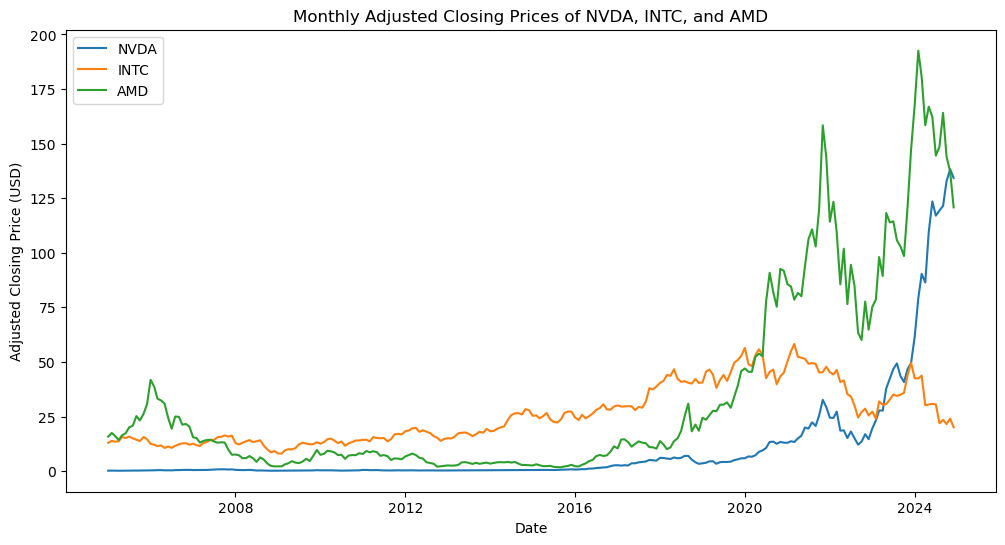

In [42]:
#Plot monthly closing prices of the three stocks from 2005 to 2024
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(prices_df.index, prices_df[asset], label=asset)

plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.title('Monthly Adjusted Closing Prices of NVDA, INTC, and AMD')
plt.legend()

<Axes: title={'center': "NVDA's Adj Closing Price"}>

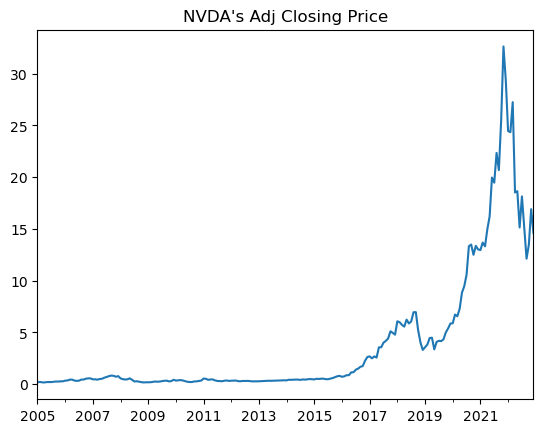

In [15]:
#Plot Nvidia's adjusted closing price from 2005 to 2024
prices_df['NVDA'].plot(title="NVDA's Adj Closing Price")

<Axes: title={'center': "INTC's Adj Closing Price"}>

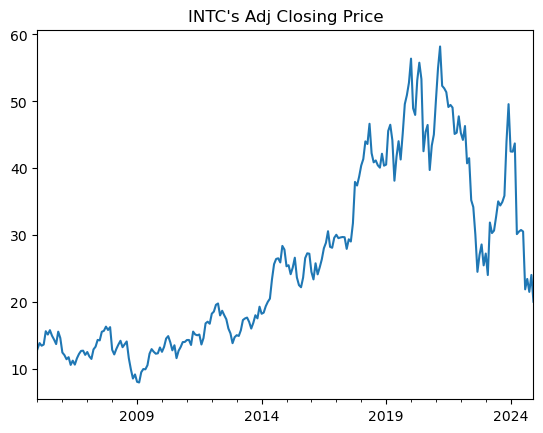

In [44]:
#Plot Intel's adjusted closing price from 2005 to 2024
prices_df['INTC'].plot(title="INTC's Adj Closing Price")

<Axes: title={'center': "AMD's Adj Closing Price"}>

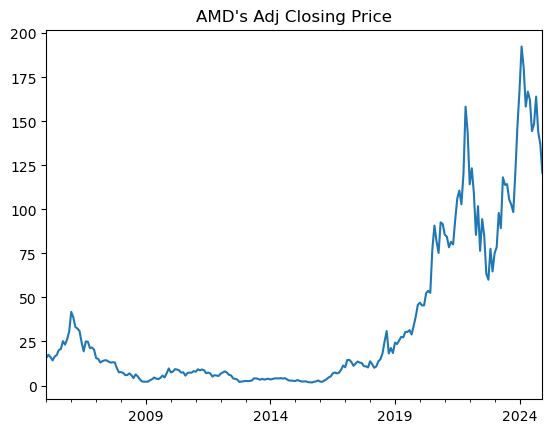

In [46]:
#Plot AMD's adjusted closing price from 2005 to 2024
prices_df['AMD'].plot(title="AMD's Adj Closing Price")

In [50]:
#Compute log returns for adjusted closing prices of Nvidia, Intel, and AMD
def compute_log_returns(prices_df):
    return np.log(prices_df / prices_df.shift(1))

log_returns_df = compute_log_returns(prices_df)

print(log_returns_df.head())

                NVDA      INTC       AMD
2005-01-01       NaN       NaN       NaN
2005-02-01  0.234940  0.066346  0.099330
2005-03-01 -0.198946 -0.028644 -0.079279
2005-04-01 -0.080148  0.012407 -0.124708
2005-05-01  0.211677  0.136503  0.141929


In [52]:
#Drop NaN values
all_monthly_ret=log_returns_df.dropna()
all_monthly_ret.head()

,NVDA,INTC,AMD
2005-02-01,0.234940,0.066346,0.099330
2005-03-01,-0.198946,-0.028644,-0.079279
2005-04-01,-0.080148,0.012407,-0.124708
2005-05-01,0.211677,0.136503,0.141929
2005-06-01,-0.014118,-0.032126,0.055735


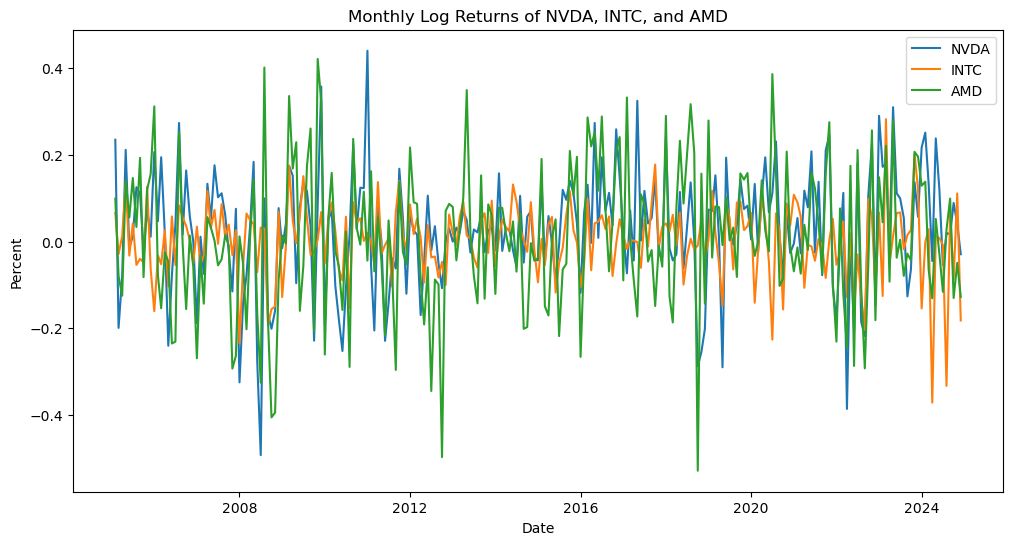

In [54]:
#Time plot of monthly log returns for Nvidia, Intel, and AMD
plt.figure(figsize=(12, 6))

for asset in log_returns_df.columns:
    plt.plot(log_returns_df.index, log_returns_df[asset], label=asset)

plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Monthly Log Returns of NVDA, INTC, and AMD')
plt.legend()

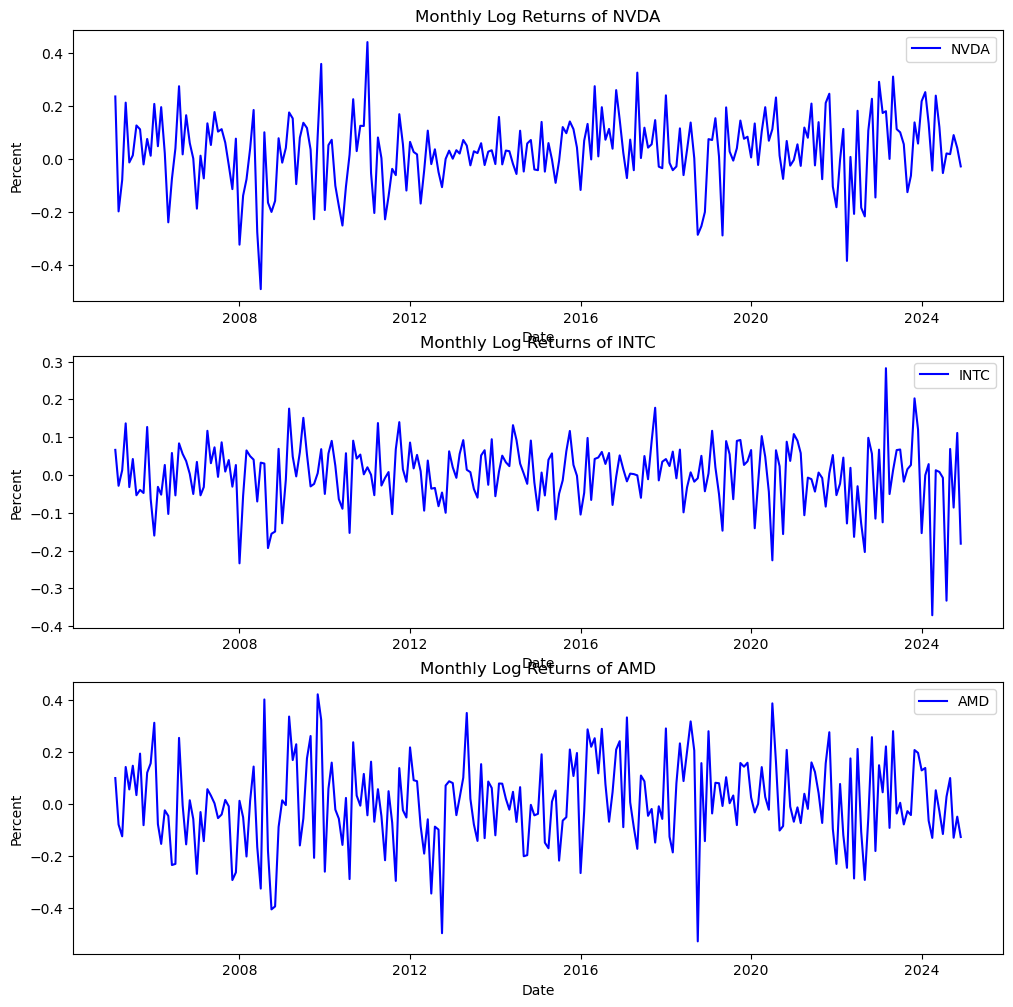

In [58]:
#Seperate time plots for log returns of Nvidia, Intel, and AMD
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

for i, asset in enumerate(log_returns_df.columns):
    axes[i].plot(log_returns_df.index, log_returns_df[asset], label=asset, color='b')
    axes[i].set_title(f'Monthly Log Returns of {asset}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Percent')
    axes[i].legend()

plt.show()

In [29]:
#Generate descriptive statistics for log returns
summary_stats = log_returns_df.describe()

summary_stats = summary_stats.loc[['mean', 'std', 'min', 'max']]

print(summary_stats)

          NVDA      INTC       AMD
mean  0.020573  0.003139  0.006562
std   0.134944  0.074890  0.169693
min  -0.492477 -0.233892 -0.528462
max   0.440347  0.177803  0.421281


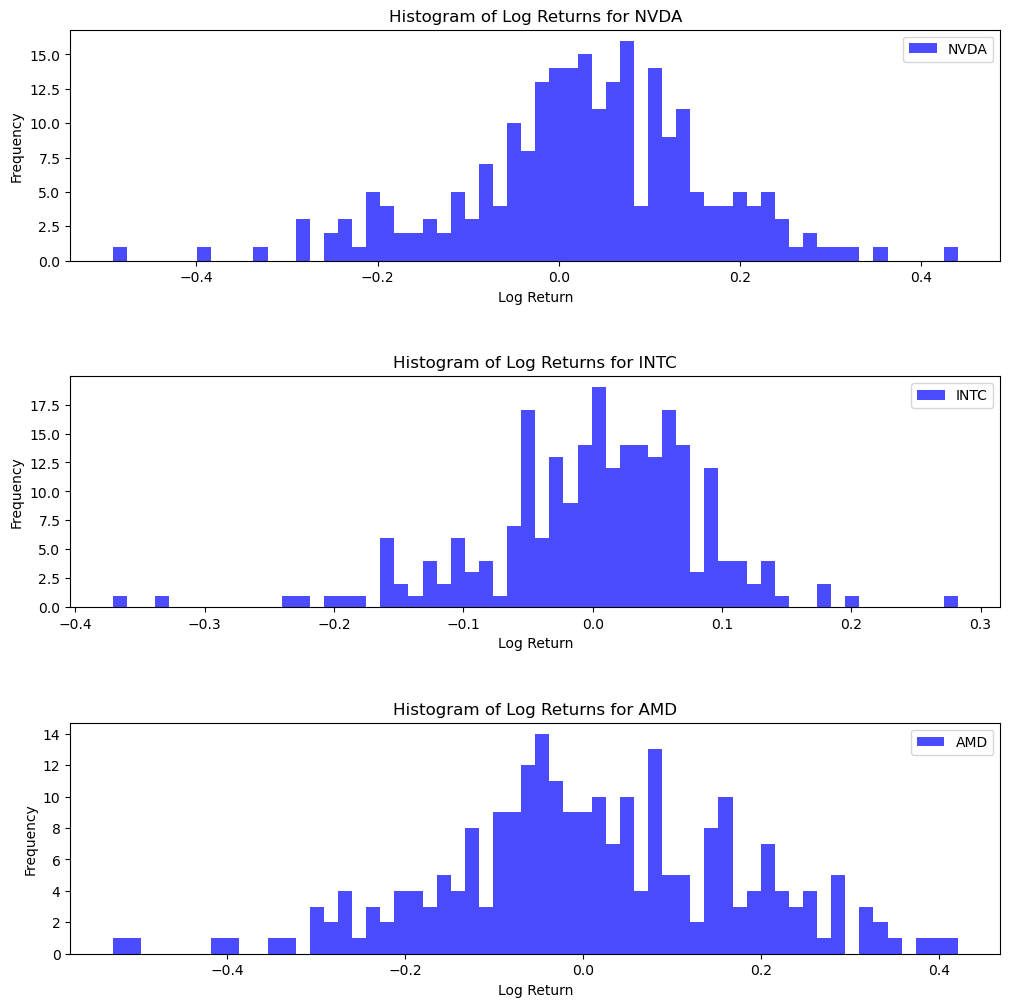

In [60]:
#Plot separate histograms for the log returns for each stock
fig, axes = plt.subplots(nrows=len(log_returns_df.columns), ncols=1, figsize=(12, 12))

for i, asset in enumerate(log_returns_df.columns):
    axes[i].hist(log_returns_df[asset], bins=60, alpha=0.7, color='b', label=asset)
    axes[i].set_title(f'Histogram of Log Returns for {asset}')
    axes[i].set_xlabel('Log Return')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

fig.subplots_adjust(hspace=0.5)

plt.show()


In [62]:
#Test mean of monthly log returns is different from zero
from scipy import stats

for column in log_returns_df.columns:

    t_stat, p_value = stats.ttest_1samp(log_returns_df[column].dropna(), 0)


    print(f"Results for {column}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}\n")

Results for NVDA:
T-statistic: 3.185879262127533
P-value: 0.0016361885730860118

Results for INTC:
T-statistic: 0.3329099266575533
P-value: 0.739495338946826

Results for AMD:
T-statistic: 0.7945909520718095
P-value: 0.4276431028912797



In [64]:
#Compute total HPR(Holding Period Return) and average annual HPR
hpr = log_returns_df.sum()
num_years = 15
avg_annual_hpr = hpr / num_years
hpr_percentage = hpr * 100
avg_hpr_percentage = avg_annual_hpr * 100

print("Total HPR for 15yrs %:")
print(hpr_percentage)
print("\n")
print("Average annual HPR 15 yrs %:")
print(avg_hpr_percentage)


Total HPR for 15yrs %:
NVDA    664.196951
INTC     43.508567
AMD     203.404356
dtype: float64


Average annual HPR 15 yrs %:
NVDA    44.279797
INTC     2.900571
AMD     13.560290
dtype: float64
